In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.io
import glob
import os
from math import cos,sin,sqrt,pow

In [84]:
# w is the length of the rectangle
def get_4_pts(p1,p2,img):
    x_max,y_max,_ = img.shape
    x1,y1 = p1
    x2,y2 = p2
    alpha = sqrt((y1-y2)**2+(x2-x1)**2)
    
    if alpha > 250 :
        w = -120
    else:
        w = -250
    
    sin_theta = (y1-y2)/alpha
    cos_theta = (x2-x1)/alpha
    x4 = w*sin_theta + x2
    x3 = w*sin_theta + x1
    y4 = w*cos_theta + y2
    y3 = w*cos_theta + y1
    if (x4 > x_max):
        x4 = x_max
    if (x3 > x_max):
        x3 = x_max
    if (y4 > y_max):
        y4 = y_max
    if (y3 > y_max):
        y3 = y_max
    if (x4 < 0):
        x4 = 0
    if (x3 < 0):
        x3 = 0
    if (y4 < 0):
        y4 = 0
    if (y3 < 0):
        y3 = 0
    p3 = [x3,y3]
    p4 = [x4,y4]
    return p1,p2,p3,p4

In [85]:
def draw_pts_on_img(img,pts,colour):
    copy_img = np.copy(img)
    for p in pts:
        copy_img = cv2.circle(copy_img, tuple(map(round, p)), radius =10, color = colour, thickness = -1)
    return copy_img

In [89]:
slots = []
iterator = 0
num_samples = 10
training_dir = 'training/'
for file in glob.glob(training_dir + '*.jpg'):
    file_name = file[:-4]
    img = cv2.imread(file)
    mat = scipy.io.loadmat(file_name + '.mat')
    s = slot_img(img,mat)
    slots.append(s)
    iterator += 1
    if iterator >= num_samples:
        break

In [90]:
class slot(object):
    def __init__(self,p1,p2,p3,p4,vacancy):
     self.update(p1,p2,p3,p4,vacancy)
    def update(self,p1,p2,p3,p4,vacancy):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.p4 = p4
        self.vacancy = vacancy
        
class slot_img(object):
    def __init__(self,img,mat):
         self.update(img,mat)
    def update(self,img,mat):
        colours = [(255,0,0),(0,255,0),(0,0,255)]
        colour_picker = 0
        self.img = img
        self.img_anot = np.copy(img)
        self.mat = mat
        self.slots_num = len(mat['slots'])
        self.slots = []
        for s in mat['slots']:
            p1_num = s[0] - 1
            p2_num = s[1] - 1
            p1 = mat['marks'][p1_num]
            p2 = mat['marks'][p2_num]
            pts = get_4_pts(p1,p2,img)
            _,_,p3,p4 = pts
            vacancy_num = s[2]
            vacancy = 'non-vacant'
            if (vacancy_num == 0):
                vacancy = 'vacant'
            elif (vacancy_num == 1):
                vacancy = 'non-vacant'
            elif (vacancy_num == 2):
                vacancy = 'parking'
            self.slots.append(slot(p1,p2,p3,p4,vacancy))
            colour = colours[colour_picker]
            
            self.img_anot = draw_pts_on_img(self.img_anot,pts,colour)
            colour_picker += 1
            colour_picker %= 3

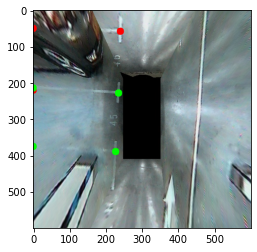

2
[235.33316062 227.5611399 ] [240.47823834  57.81295337] [0, 219.98710322800957] [0, 50.238916699512146] non-vacant
[226.80673575 388.58290155] [235.33316062 227.5611399 ] [0, 375.3634208796032] [0, 214.34165922157214] vacant


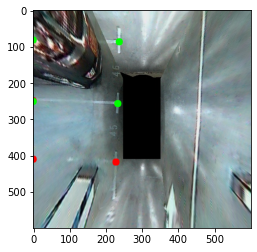

2
[228.32926829 417.70354767] [233.25077605 256.59756098] [0, 410.0700433231517] [0, 248.96405662692104] vacant
[233.25077605 256.59756098] [237.05462185  87.47478992] [0, 250.97607664673464] [0, 81.85330558709136] non-vacant


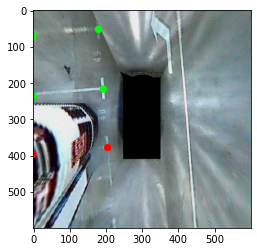

2
[205.48134715 377.58393782] [192.7        216.85294118] [0, 397.40140764842283] [0, 236.67041100105914] non-vacant
[192.7        216.85294118] [180.03569845  53.04988914] [0, 236.12398024431582] [0, 72.32092820310028] vacant


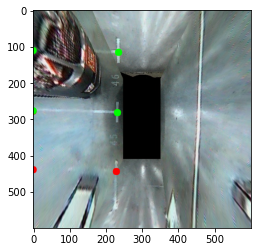

2
[229.20588235 443.62941176] [231.9880829  281.84715026] [0, 439.3307494681846] [0, 277.5484879625462] vacant
[231.9880829  281.84715026] [235.18115299 115.97760532] [0, 277.035419131422] [0, 111.1658741938624] non-vacant


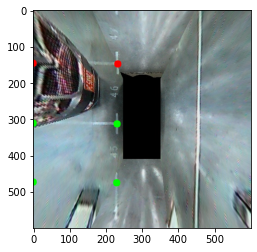

2
[231.32039911 312.87339246] [232.65077605 148.30665188] [0, 310.85242901262035] [0, 146.28568843612362] non-vacant
[229.87621832 475.49025341] [231.32039911 312.87339246] [0, 473.2701210198389] [0, 310.65326006973015] vacant


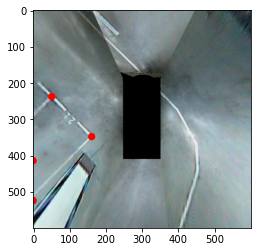

1
[161.32176166 347.73212435] [ 51.32352941 237.61764706] [0, 524.415436405857] [0, 414.3009591123488] vacant


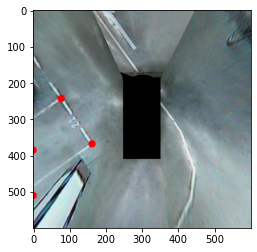

1
[162.39430052 368.25751295] [ 76.79667406 243.49379157] [0, 509.6905761553851] [0, 384.92685477629664] vacant


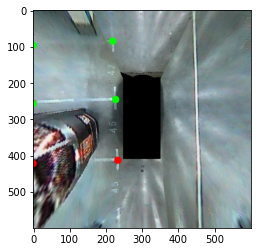

2
[233.05077605 412.65166297] [226.52926829 246.15454545] [0, 422.4363831978914] [0, 255.9392656812617] non-vacant
[226.52926829 246.15454545] [219.35284974  85.35595855] [0, 257.30091537261865] [0, 96.50232846729592] vacant


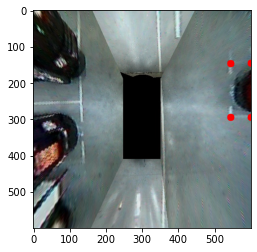

1
[543.9014333  147.05005513] [544.37772021 295.31865285] [600, 146.2469780413615] [600, 294.51557576431077] non-vacant


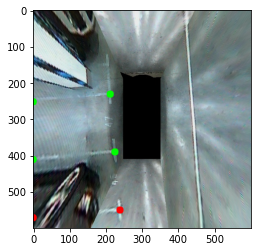

2
[238.87823834 549.84093264] [225.39889135 389.70487805] [0, 570.8103616537693] [0, 410.6743070600627] non-vacant
[225.39889135 389.70487805] [211.69512195 230.79002217] [0, 411.1835179082084] [0, 252.2686620323769] vacant


In [92]:
for s in slots:
    plt.imshow(s.img_anot)
    plt.show()
    print(s.slots_num)
    for slot in s.slots:
        print(slot.p1,slot.p2,slot.p3,slot.p4,slot.vacancy)